In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import joblib
from sklearn.linear_model import LogisticRegression

In [3]:
# Load the dataset
cancer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-nose for beef quality monitoring dataset.csv')

X = cancer_data.drop(columns=['minute','class','MQ136','MQ5','MQ3','MQ4','MQ8'])
y = cancer_data['class']

# Get feature names
feature_names = X.columns  # Get feature names

#df = pd.DataFrame(data=X, columns=feature_names)


# Explore the data
print(cancer_data.head())
print(cancer_data.info())  # Check for missing values
print(cancer_data.describe())  # Summary statistics

   minute  class       TVC  MQ135  MQ136    MQ2    MQ3    MQ4    MQ5   MQ6  \
0       1  Fresh  2.567364  22.86  41.24  29.56  14.83  49.38  11.10  2.21   
1       2  Fresh  2.567620  22.75  41.50  29.72  14.83  49.38  11.23  2.23   
2       3  Fresh  2.567878  22.75  41.50  29.72  14.83  49.38  11.28  2.22   
3       4  Fresh  2.568139  22.86  42.56  29.56  14.77  49.38  11.46  2.22   
4       5  Fresh  2.568404  23.07  42.03  29.56  14.83  49.38  11.46  2.22   

    MQ7    MQ8    MQ9  Humidity  Temperature  
0  1.40  32.09  14.29      55.1         34.6  
1  1.39  31.92  14.58      55.1         34.6  
2  1.42  34.31  14.40      55.1         34.6  
3  1.39  34.12  14.64      55.4         34.5  
4  1.39  33.93  14.58      55.4         34.4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute       4553 non-null   int64  
 1   class      

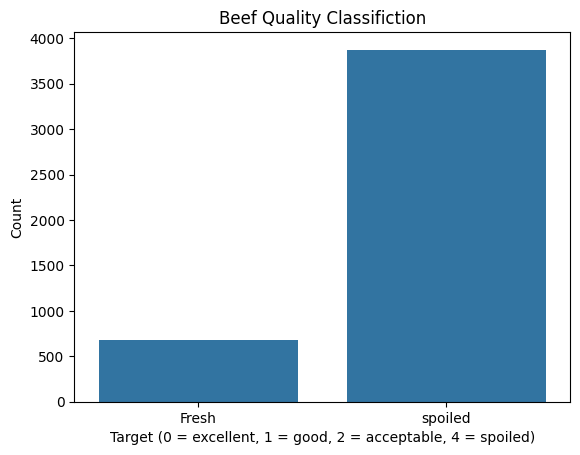

ValueError: could not convert string to float: 'Fresh'

<Figure size 1200x1000 with 0 Axes>

In [4]:
# Countplot of the target
sns.countplot(x='class', data=cancer_data)
plt.title('Beef Quality Classifiction')
plt.xlabel('Target (0 = excellent, 1 = good, 2 = acceptable, 4 = spoiled)')
plt.ylabel('Count')
plt.show()

# Pairplot of selected features
# sns.pairplot(cancer_data, vars=['TVC' ,'MQ135', 'MQ136', 'MQ2', 'MQ3' ,'MQ4' , 'MQ5' , 'MQ6' , 'MQ9' ,], hue='class', diag_kind='kde')
# plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cancer_data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [5]:
# Separate features and target
#X = df.drop(columns=['target'])
y = cancer_data['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification

# Initialize and train the model
svm_model = OneVsRestClassifier(SVC(C=5, kernel='linear', probability=True, random_state=42))
svm_model.fit(X_train, y_train)

#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model with L2 regularization (default)
lr_model = LogisticRegression(C=1, penalty='l2', random_state=42)
lr_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

#Ls Accuracy
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict on the test set
#y_pred = svm_model.predict(X_test)

              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       1.00      1.00      1.00      1366
weighted avg       1.00      1.00      1.00      1366

              precision    recall  f1-score   support

       Fresh       0.98      1.00      0.99       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       0.99      1.00      0.99      1366
weighted avg       1.00      1.00      1.00      1366



Classification Report:

              precision    recall  f1-score   support

       Fresh       0.98      1.00      0.99       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       0.99      1.00      0.99      1366
weighted avg       1.00      1.00      1.00      1366



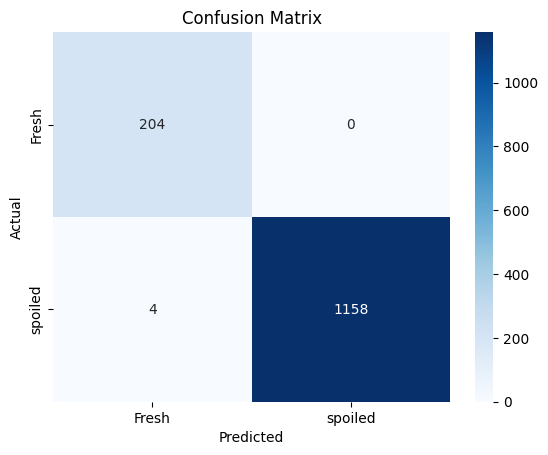

Model Accuracy of SVM: 1.00
Model Accuracy of Logistic Regression: 1.00


In [7]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fresh', 'spoiled'], yticklabels=['Fresh', 'spoiled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy_svm = svm_model.score(X_test, y_test)
accuracy_lr = lr_model.score(X_test, y_test)
print(f"Model Accuracy of SVM: {accuracy_svm:.2f}")
print(f"Model Accuracy of Logistic Regression: {accuracy_lr:.2f}")

In [8]:
from sklearn.model_selection import GridSearchCV

# Define a grid of parameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Classification Report after Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9996865203761756
Classification Report after Hyperparameter Tuning:

              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       1.00      1.00      1.00      1366
weighted avg       1.00      1.00      1.00      1366



(400, 400)


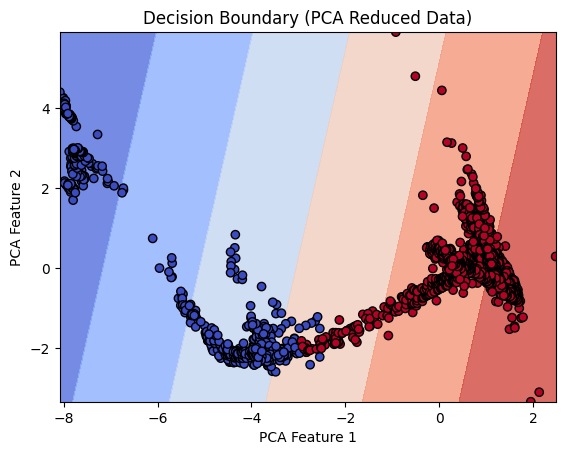

In [9]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

#label encoder
encoder = LabelEncoder()

# Fit the encoder to your labels and transform them into numerical values
y_encoded = encoder.fit_transform(y)


# Retrain the model on 2D data
svm_model_pca = SVC(kernel='linear', C=1, random_state=42, decision_function_shape='ovr')
svm_model_pca.fit(X_train_pca, y_train_pca)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 400),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 400))
Z = svm_model_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
if Z.ndim == 2 and Z.shape[1] > 1:   # Multi-class case
    Z = Z.max(axis=1)
Z = Z.reshape(xx.shape)
print(Z.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary (PCA Reduced Data)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

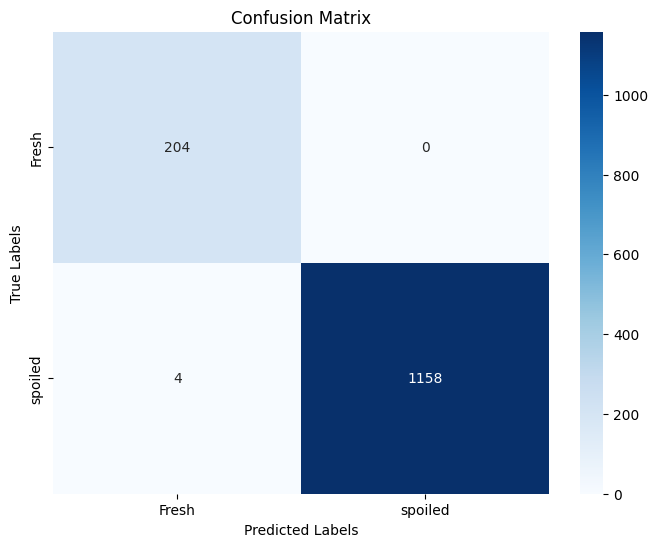

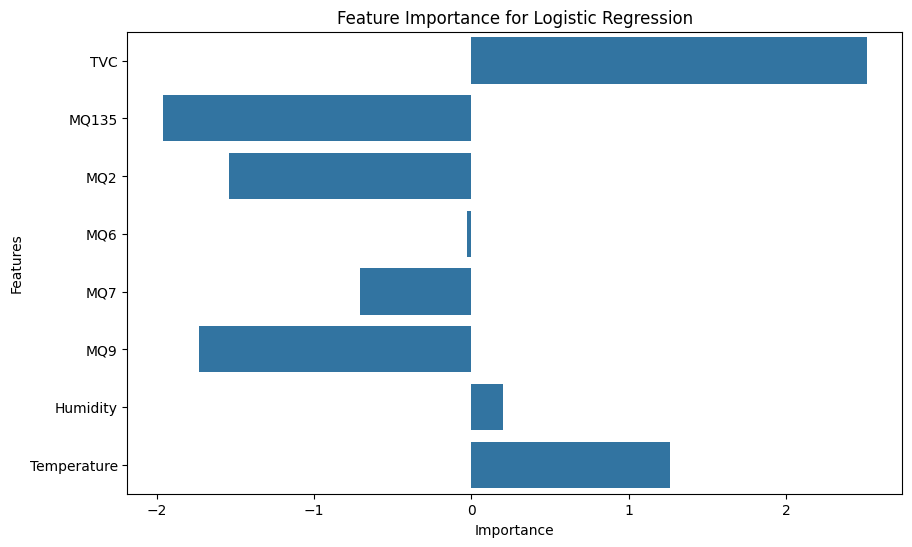

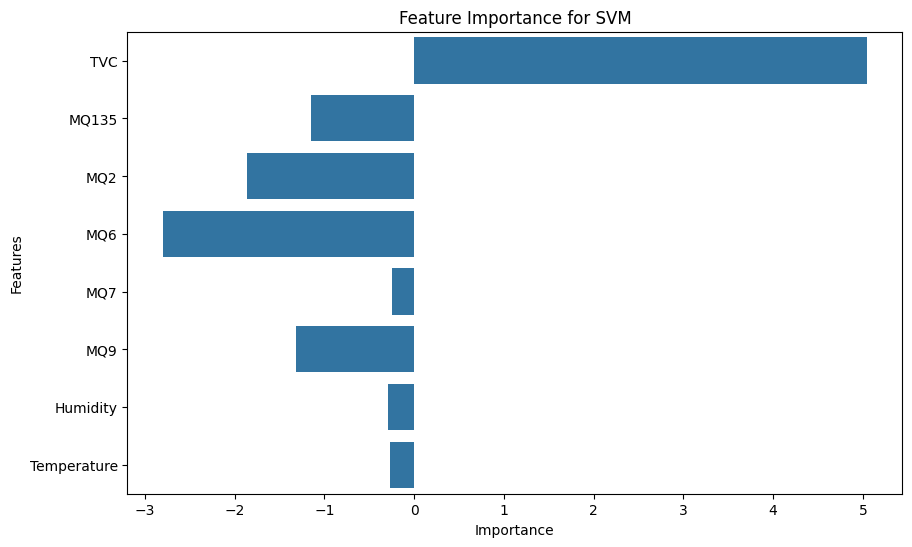

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

       Fresh       0.98      1.00      0.99       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       0.99      1.00      0.99      1366
weighted avg       1.00      1.00      1.00      1366



In [ ]:
# Step 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 2: Feature Importance (For tree-based models)
feature_importances_lr = lr_model.coef_[0]  # For logistic regression
feature_importances_svm = svm_model.estimators_[0].coef_[0]   # For SVM

features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_lr, y=features)
plt.title("Feature Importance for Logistic Regression")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_svm, y=features)
plt.title("Feature Importance for SVM")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Step 3: Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
target_names = [str(c) for c in encoder.classes_]
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import os
save_dir = r'/content/drive/MyDrive/Colab Notebooks'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_path_1 = os.path.join(save_dir, 'svm_model.pkl')
file_path_2 = os.path.join(save_dir, 'logistic_regression_model.pkl')
# Save the trained model
joblib.dump(svm_model, file_path_1)
print(f"\nModel saved at: {file_path_1}")

joblib.dump(lr_model, file_path_2)
print(f"\nModel saved at: {file_path_2}")


Model saved at: /content/drive/MyDrive/Colab Notebooks/svm_model.pkl

Model saved at: /content/drive/MyDrive/Colab Notebooks/logistic_regression_model.pkl


In [11]:
joblib.dump(scaler, "/content/drive/MyDrive/Colab Notebooks/scaler.pkl")


['/content/drive/MyDrive/Colab Notebooks/scaler.pkl']